
# Student Performance Indicator

### Life cycle of Machine learning project

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Training
- Choose best model

## 1. Problem statement
- This project understands how the students
preformance (test scores ) is affected by other variable such as Gender,Ethnicity, Parental level of education,Lunch and Test preparation course.

## 2. Data collection
- The data contain 1000 rows


#### Import libraries and load dataset

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# shape of the dataset
df.shape

(1000, 8)

In [4]:
# check duplicate

duplicate = df.duplicated()
print(duplicate.sum())

0


In [5]:
# check data type
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [6]:
# check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There are no duplicates in the dateset
- There are 5 categorical columns and 3 numerical columns in the dataset
- There are no missing numbers in the dataset

In [7]:
# Descriptive statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Since the 3 numerical features are exam score, they have common statistical features 
such as same Maximum value, similiar mean and std.

In [11]:
# Lets check uniqueness of the categorical columns
print('Gender unique values: ',end="")
print(df['gender'].unique())
print("*"*30)
print('race_ethnicity unique values: ',end="")
print(df['race_ethnicity'].unique())
print("*"*30)
print('parental_level_of_education unique values: ',end="")
print(df['parental_level_of_education'].unique())
print("*"*30)
print('lunch unique values: ',end="")
print(df['lunch'].unique())
print("*"*30)
print('test_preparation_course unique values: ',end="")
print(df['test_preparation_course'].unique())

Gender unique values: ['female' 'male']
******************************
race_ethnicity unique values: ['group B' 'group C' 'group A' 'group D' 'group E']
******************************
parental_level_of_education unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
******************************
lunch unique values: ['standard' 'free/reduced']
******************************
test_preparation_course unique values: ['none' 'completed']


In [12]:
## Add Total test score and Average test score to the dataset
df['Total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average_score'] = df['Total_score']/3

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
df.describe()

,math_score,reading_score,writing_score,Total_score,Average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [24]:
reading_full =df[df['reading_score']==100]['Average_score'].count()
math_full = df[df['math_score']==100]['Average_score'].count()
writing_full = df[df['writing_score']==100]['Average_score'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Maths: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Maths: 7


In [25]:
reading_less_20 =df[df['reading_score']<=20]['Average_score'].count()
math_less_20 = df[df['math_score']<=20]['Average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['Average_score'].count()

print(f'Number of students with less 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less 20 marks in Maths: {math_less_20}')

Number of students with less 20 marks in Reading: 1
Number of students with less 20 marks in Writing: 3
Number of students with less 20 marks in Maths: 4


- From the above analysis, most students perform best in reading and writing than maths

## Data Visualiztion

- Visualize the average score distribution to make some conclusion
-- Histogram
-- Kernel Distribution Function

##### Histogram and KDE

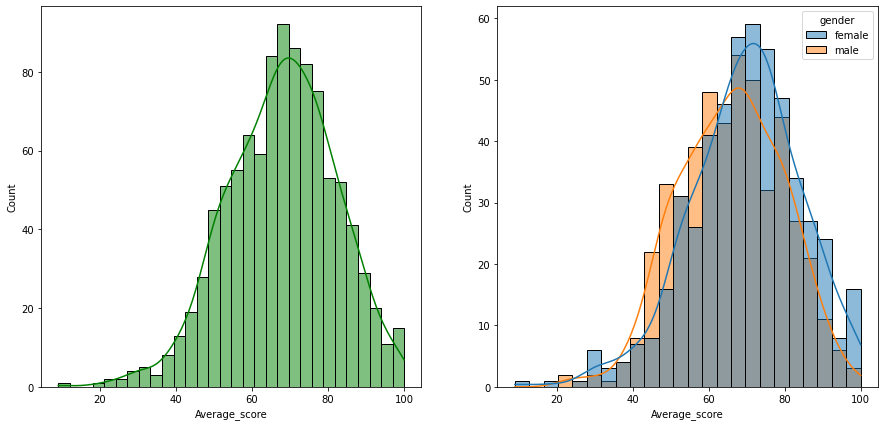

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average_score', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
plt.show()

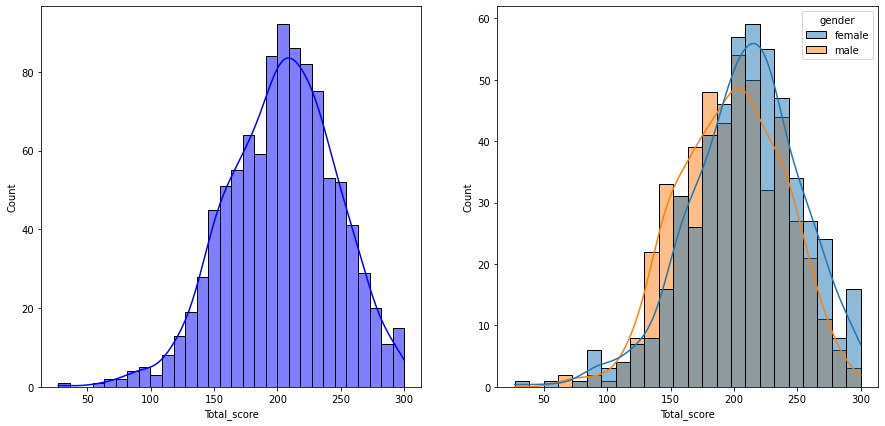

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total_score', bins=30, kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

- Female students perform well than male students

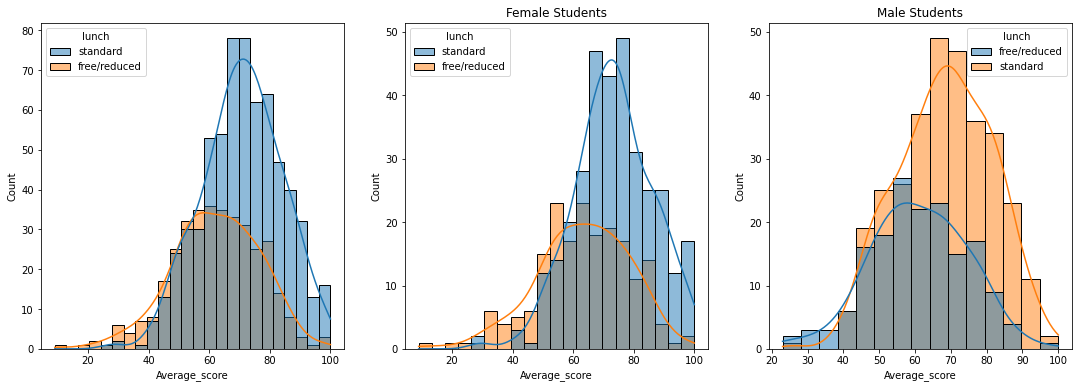

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.title('Female Students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.title('Male Students')
plt.show()

#### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams for male and female students

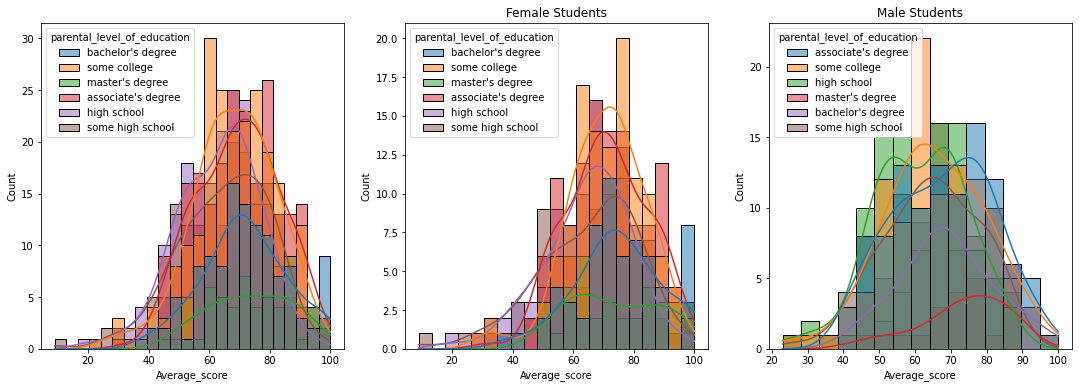

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.title('Female Students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.title('Male Students')
plt.show()

- From the above plots, higher educational level of students' parent does not affect students
performance that much.


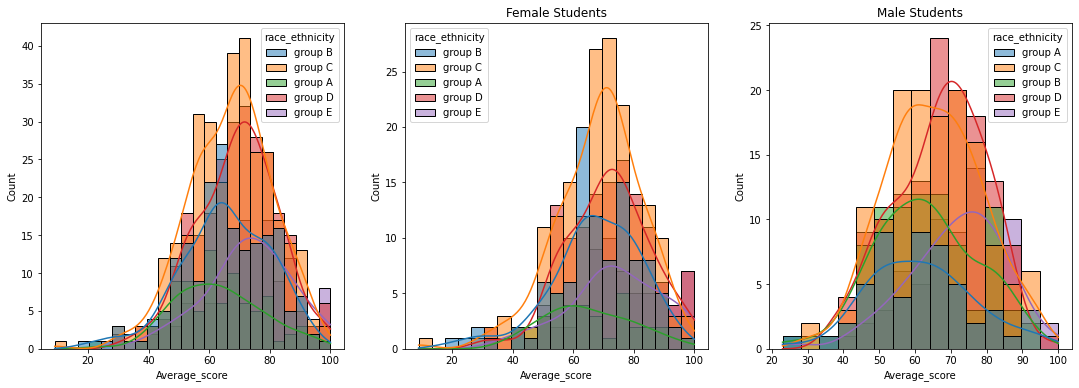

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.title('Female Students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.title('Male Students')
plt.show()

- Students in groups A and B tend to perform poorly in exams
- Students in groups C and D perform well in exams

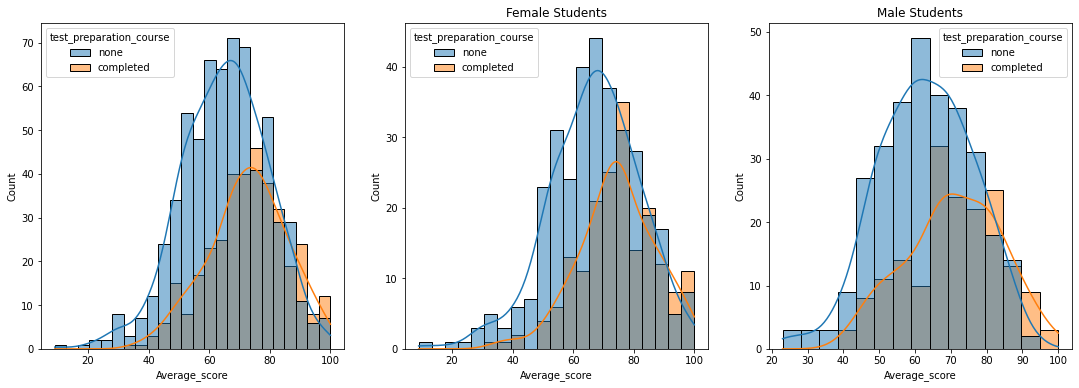

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average_score',kde=True,hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='test_preparation_course')
plt.title('Female Students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='test_preparation_course')
plt.title('Male Students')
plt.show()

- Students who did not complete their test preparation course tend to outperform those who completed it

#### Multivariate analysis using pieplot

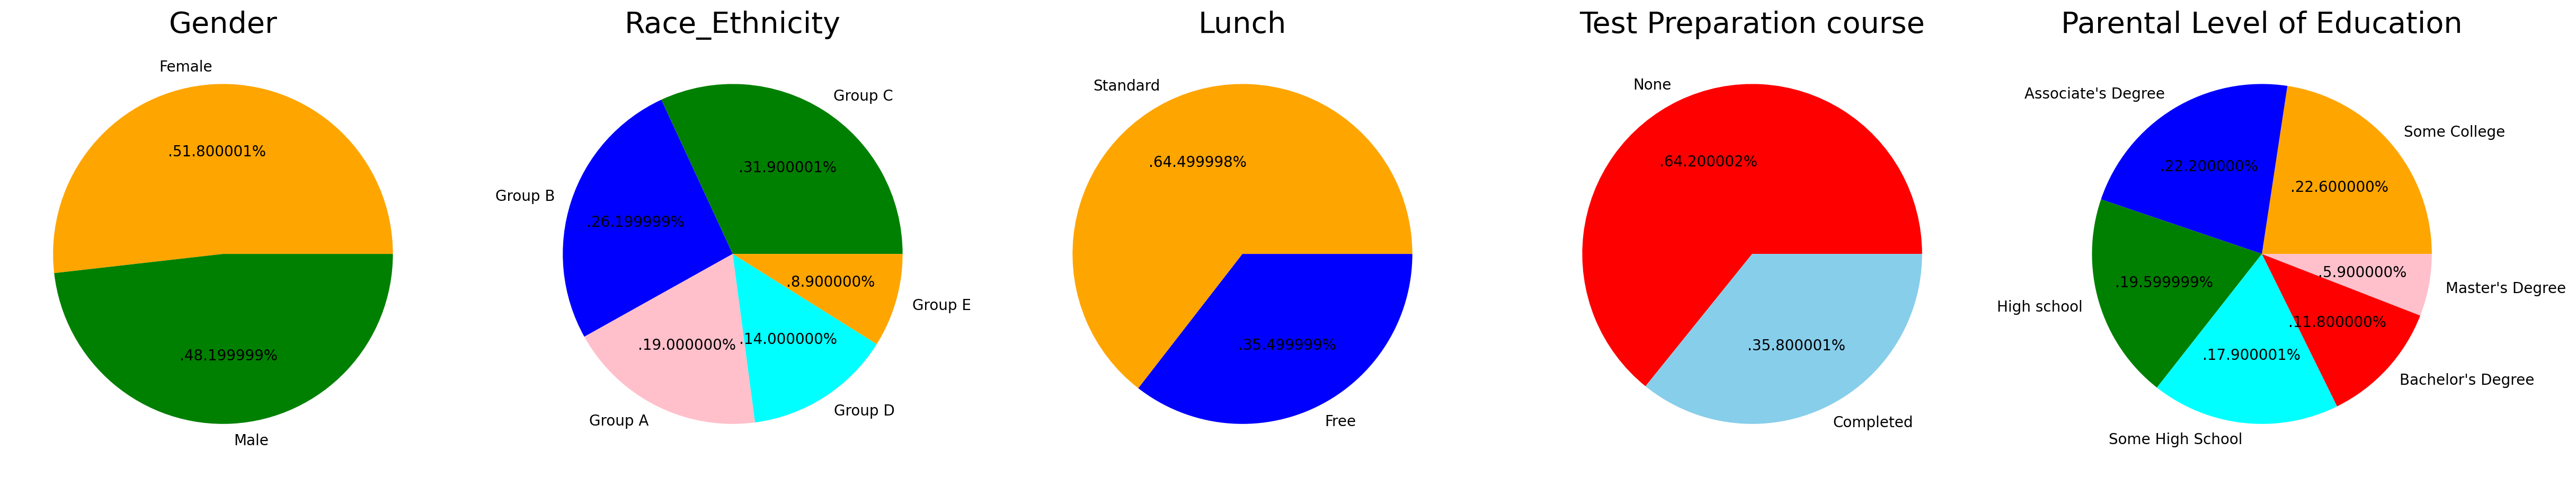

In [48]:
plt.rcParams['figure.figsize'] = (30,12)
plt.rcParams['figure.dpi'] = 200
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['orange','green']

plt.pie(size,colors =color, labels=labels, autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels = 'Group C','Group B','Group A','Group D','Group E'
color = ['green','blue','pink','cyan','orange']

plt.pie(size,colors =color, labels=labels, autopct='.%2f%%')
plt.title('Race_Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['orange','blue']

plt.pie(size,colors =color, labels=labels, autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['red','skyblue']

plt.pie(size,colors =color, labels=labels, autopct='.%2f%%')
plt.title('Test Preparation course',fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College',"Associate's Degree",'High school','Some High School',"Bachelor's Degree","Master's Degree"
color = ['orange','blue','green','cyan','red','pink']

plt.pie(size,colors =color, labels=labels, autopct='.%2f%%')
plt.title('Parental Level of Education',fontsize=20)
plt.axis('off')
plt.show()

### Distribution of categorical variables

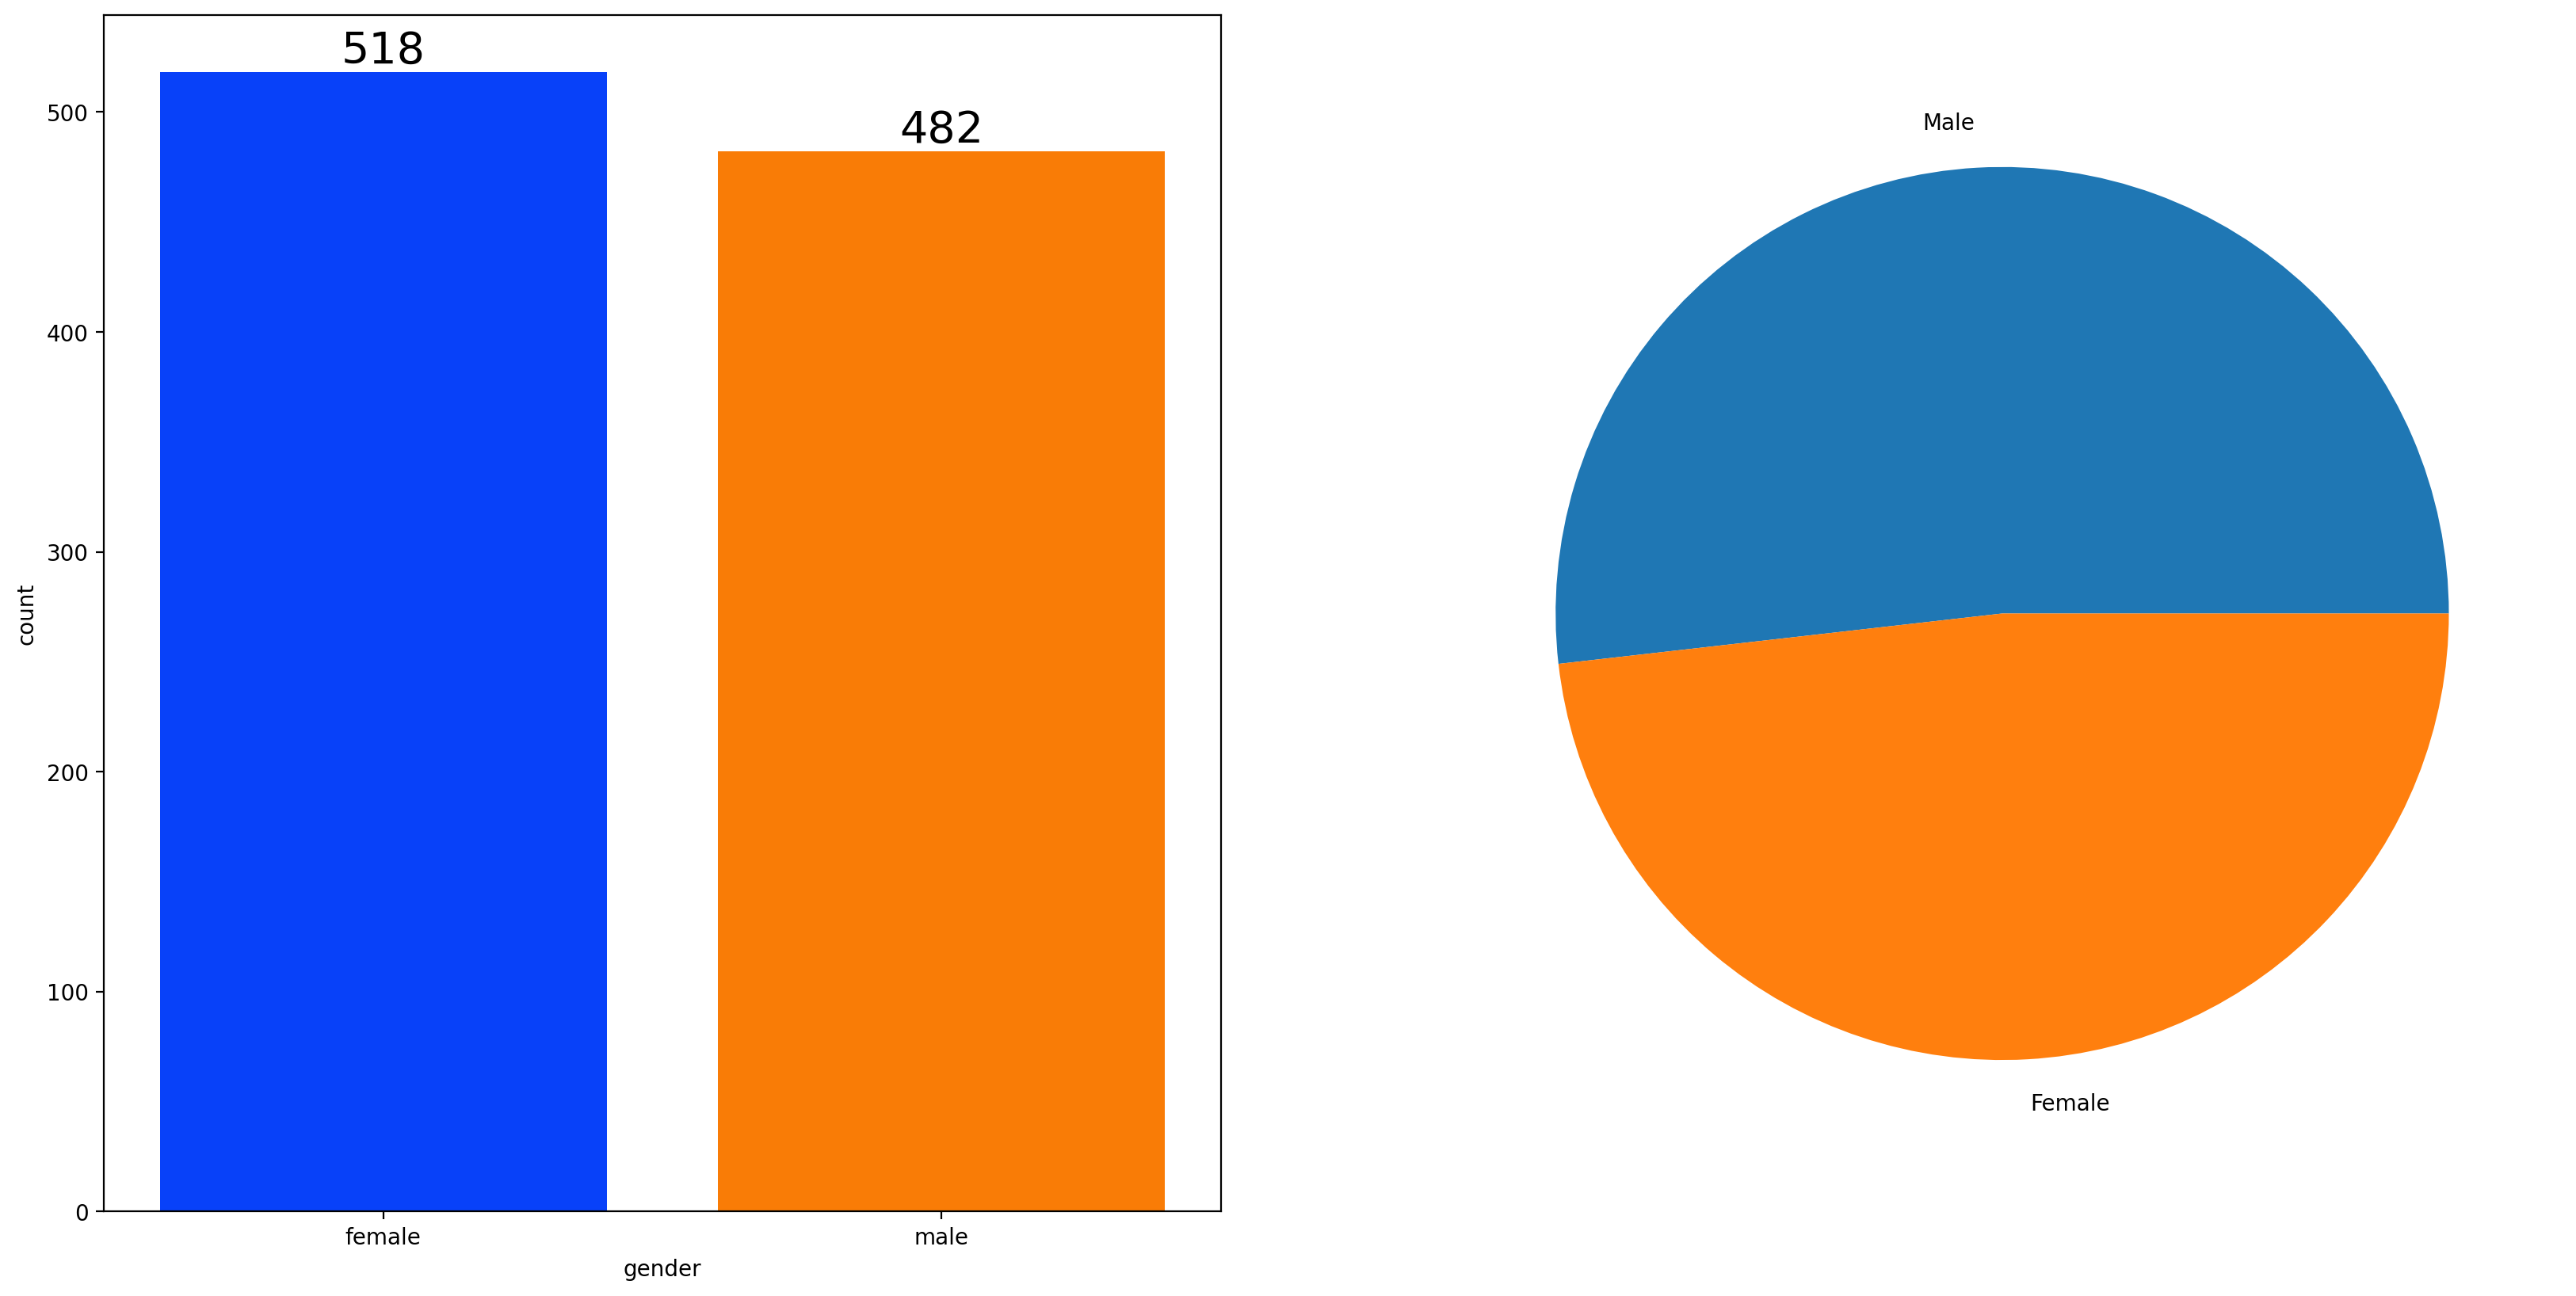

In [49]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'])
plt.show()

#### Bivariate Analysis (is gender has any impact on students' performance?)

In [50]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


- Female students performed well in the reading and writing than in maths.
- Male students were better in maths
- Female students had high overall marks


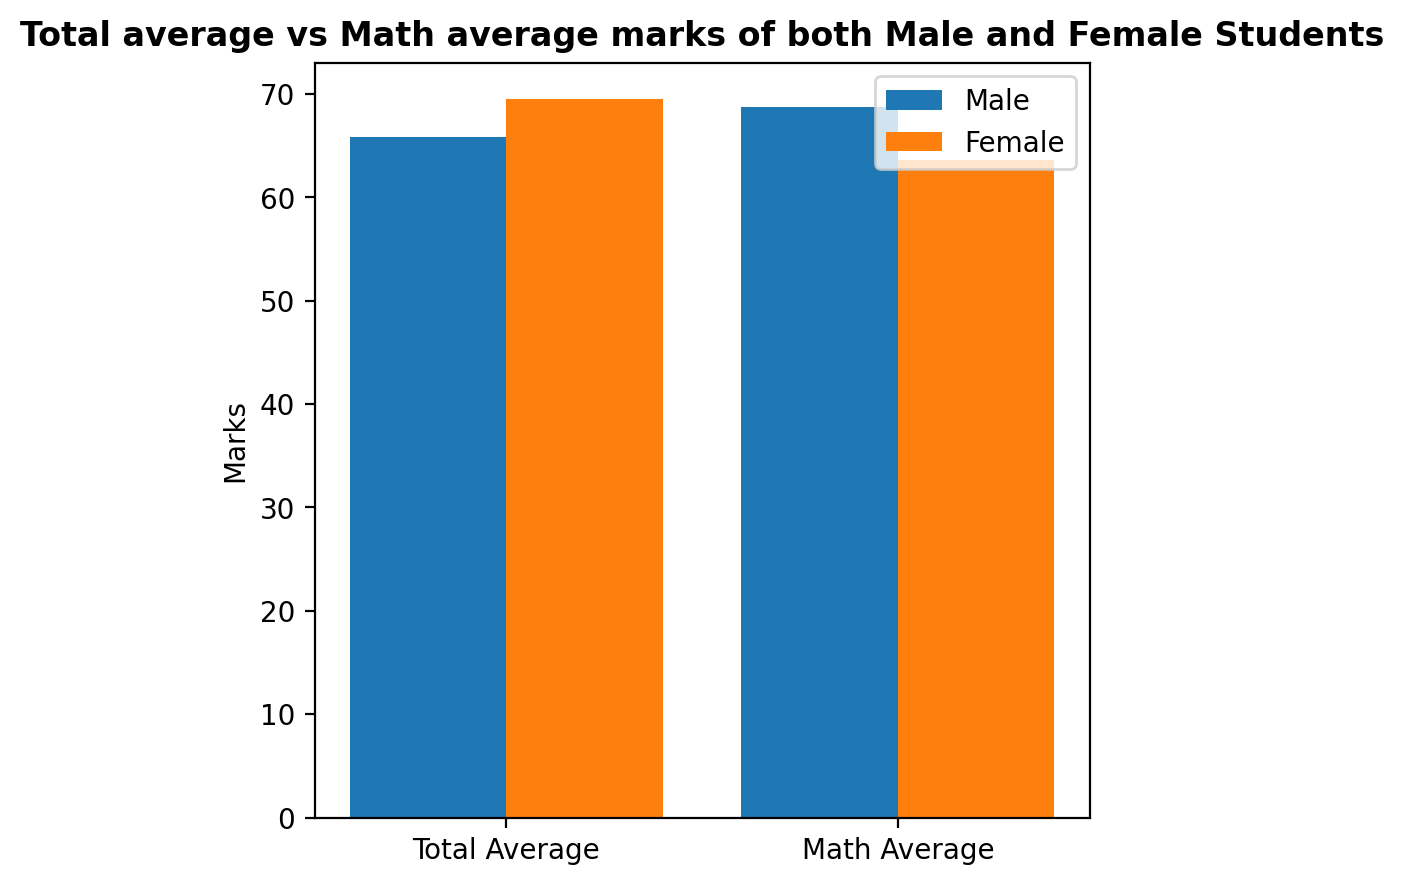

In [54]:
plt.figure(figsize=(5,5))
x = ['Total Average','Math Average']

female_scores =[gender_group['Average_score'][0],gender_group['math_score'][0]]
male_scores =[gender_group['Average_score'][1],gender_group['math_score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis-0.2, male_scores, 0.4,label='Male')
plt.bar(x_axis + 0.2, female_scores, 0.4,label='Female')


plt.xticks(x_axis,x)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both Male and Female Students", fontweight='bold')
plt.legend()
plt.show()

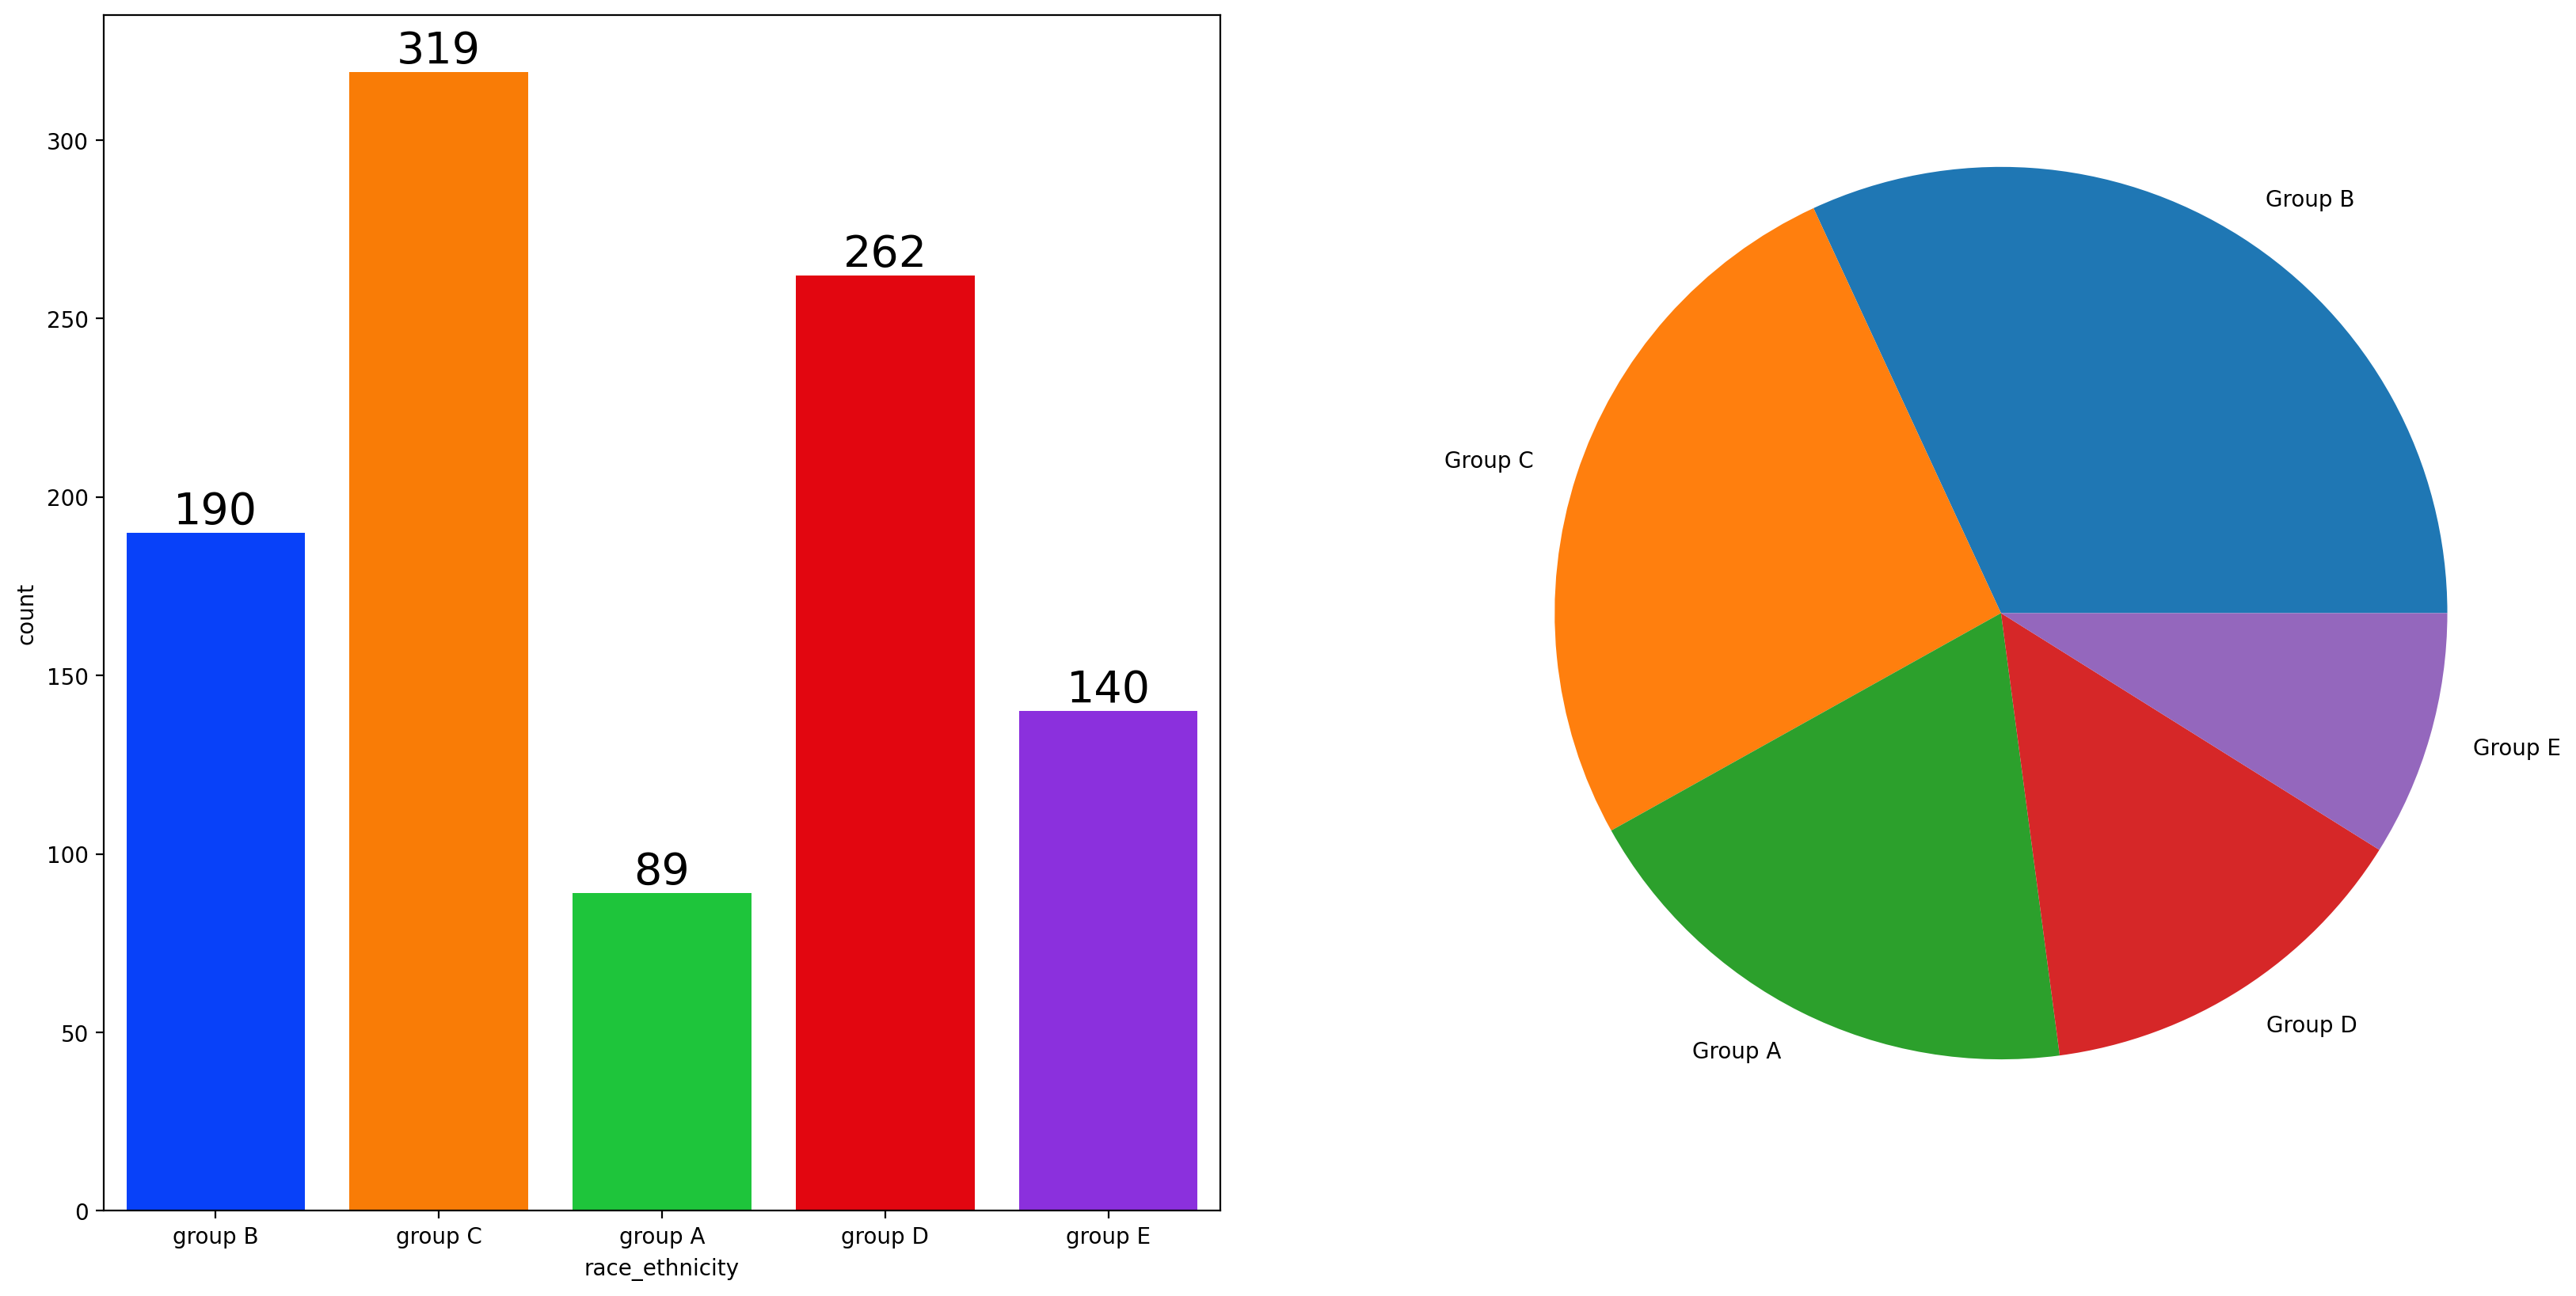

In [59]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=['Group B','Group C','Group A','Group D','Group E'])
plt.show()

- Most of the students belond to Group C and Group D
- Lowest number of students belong to Group A

#### Bivariate Analysis (Is Race_Ethnicity has any impact on students' performance?)

In [61]:
Group_data = df.groupby('race_ethnicity')['math_score'].mean()
Group_data

race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64